<a href="https://colab.research.google.com/github/Joe14th/MachineLearning/blob/master/LogisticRegression(Multi).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
from sklearn.datasets import load_digits

In [0]:
digits = load_digits()

In [0]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [0]:
digits.data[0] #8x8 image - 64 one dimensional array

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

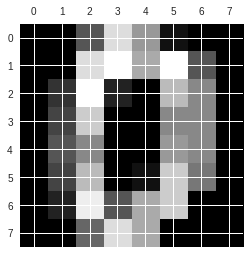

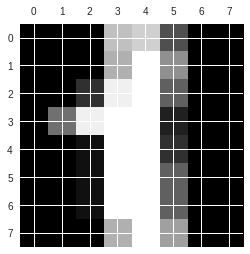

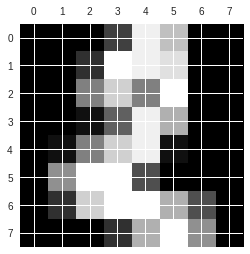

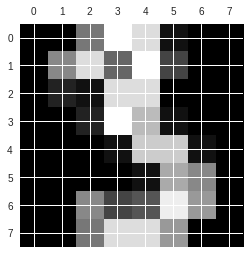

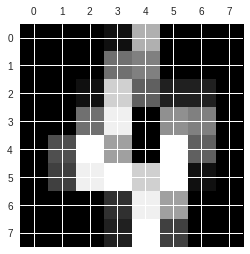

In [0]:
plt.gray()
for i in range(5):
  plt.matshow(digits.images[i]) #actual image

In [0]:
#look at target and target names
digits.target[0:5] # says what it is

array([0, 1, 2, 3, 4])

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
#divide data into training and test samples, 80% for training, 20% for testing
xtrain, xtest, ytrain, ytest = train_test_split(digits.data, digits.target, test_size=0.2)

In [0]:
len(xtrain) #roughly 80%

1437

In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [0]:
#training model
model.fit(xtrain, ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
#how accurate is model    #compare yprecidted and ytarget
model.score(xtest, ytest)

0.9527777777777777

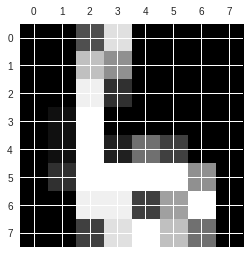

In [0]:
#pick up random sample
plt.matshow(digits.images[67])
#make prediction
#model.predict()

In [0]:
digits.target[67]

6

In [0]:
#check what model will actually predict
model.predict([digits.data[67]]) #using data instead of image

array([6])

In [0]:
model.predict(digits.data[0:5]) #this is already a list so no need for extra []

array([0, 1, 2, 3, 4])

In [0]:
#know where model failed/ accuracy
#confusion matrix
#get all predicted values for xtest
ypredicted = model.predict(xtest)
from sklearn.metrics import confusion_matrix

#supply target and prediction
cm = confusion_matrix(ytest, ypredicted)
cm
#better visualized in plot

array([[29,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  1,  0,  1,  0],
       [ 0,  0, 34,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 34,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  1,  1, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 44,  0,  2],
       [ 0,  1,  1,  0,  0,  1,  0,  0, 24,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  3, 35]])

Text(69.0, 0.5, 'Truth')

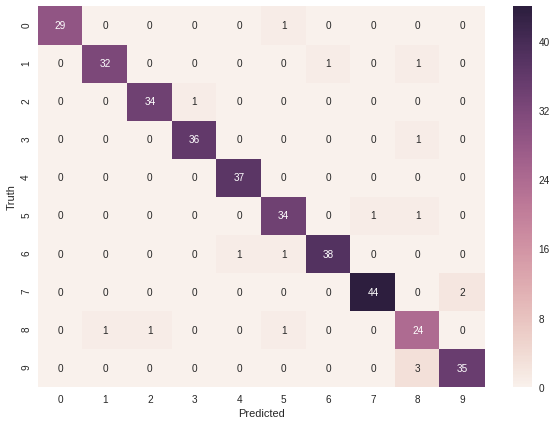

In [0]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
#29 times the truth was 0 and model predicted 0
#32 times the model was 8(y axis [top to bottom]) but 1 time model said it was 1(x axis)